In [1]:
import numpy as np

In [2]:
X = np.array([1, 2, 3])

print(X)

[1 2 3]


In [3]:
B = np.array([10])
print(B)

[10]


In [4]:
print(X + B)

[11 12 13]


In [5]:
print(np.array([1, 2, 3]) + np.array([10, 10, 10]))

[11 12 13]


In [6]:
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        # wb_width = 0.01 가중치와 편향 설정을 위한 정규분포의 표준편차
           
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u # 항등함수
            
    def backward(self, t):
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
             
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [7]:
class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1 + np.exp(-u)) # 시그모이드
               
    def backward(self, grad_y):
        delta = grad_y * (1 - self.y) * self.y
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
          
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [8]:
import matplotlib.pyplot as plt

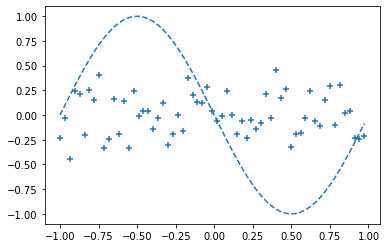

Epoch:0/2001 Error:0.27562541532838175


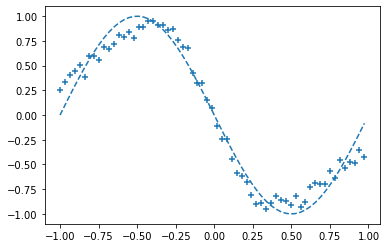

Epoch:200/2001 Error:0.008279603435856087


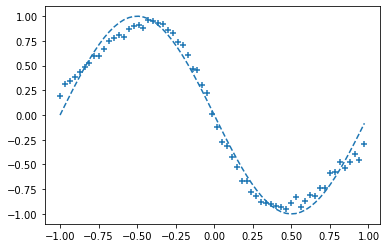

Epoch:400/2001 Error:0.005183742955841876


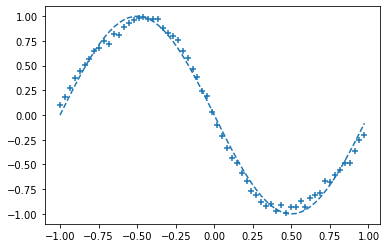

Epoch:600/2001 Error:0.0019429433656268729


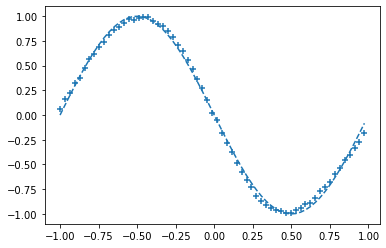

Epoch:800/2001 Error:0.0007255355509056547


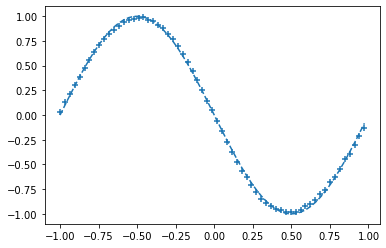

Epoch:1000/2001 Error:0.00021337005705280795


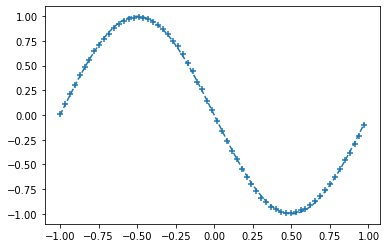

Epoch:1200/2001 Error:7.444083675682138e-05


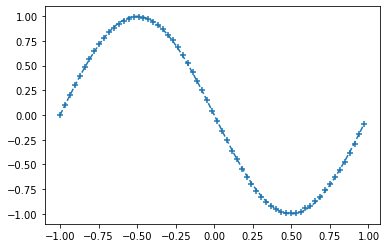

Epoch:1400/2001 Error:3.135806509378279e-05


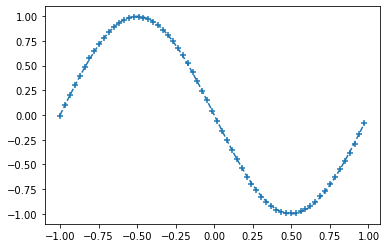

Epoch:1600/2001 Error:1.6156680823727336e-05


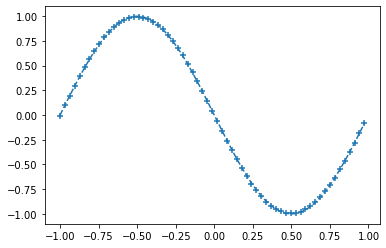

Epoch:1800/2001 Error:1.1316546727948822e-05


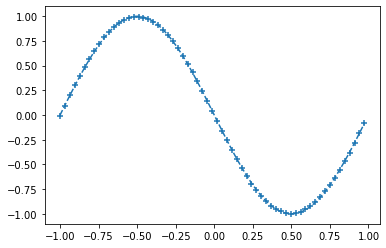

Epoch:2000/2001 Error:9.66584854726672e-06


In [9]:
input_data = np.arange(0, np.pi*2, 0.1)
correct_data = np.sin(input_data)
input_data = (input_data - np.pi) / np.pi # 입력을 -1.0 ~ 1.0
n_data = len(correct_data)

# 초깃값 설정
n_in = 1 # 입력층의 뉴런 수
n_mid = 3 # 은닉층의 뉴런 수
n_out = 1 # 출력층의 뉴런 수

wb_width = 0.01
eta = 0.1 # 학습률 learning rate
epoch = 2001
interval = 200

# 각 층의 초기화
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

for i in range(epoch):
    
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx:idx+1]
        t = correct_data[idx:idx+1]
        
        middle_layer.forward(x.reshape(1,1))
        output_layer.forward(middle_layer.y)
        
        output_layer.backward(t.reshape(1,1))
        middle_layer.backward(output_layer.grad_x)
        
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1)
            
            total_error += 1.0 / 2.0 * np.sum(np.square(y - t))
            
            plot_x.append(x)
            plot_y.append(y)
              
    if i % interval == 0:
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker='+')
        plt.show()
        
        print("Epoch:"+str(i)+'/'+str(epoch), "Error:"+str(total_error/n_data))

- 은닉층의 뉴런수를 1, 2, 3, 4, 5 차례로 증가시키며 결과를 확인
- 3 또는 4개의 뉴런 이후 에는 결과가 더 좋아지지 않고 계산량만 증가
- 이 문제에서는 은닉층에서 3 또는 4개의 뉴런이 최적임
- 은닉층에서 필요 이상의 뉴런 수는 과적합(Overfitting)을 일으킴